In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:

from fastai.text import *

In [0]:

import pandas as pd
d=pd.read_excel(io='bppfinal2.xls')
d1=pd.read_excel(io='schfinal2.xlsx')
d2=pd.read_excel(io='ocdfinal2.xlsx')

In [43]:
d.head()

,Statement,Disorder
0,I’ve noticed an increase in my goal-directed a...,bipolar
1,I find that my thoughts race faster in my hea...,bipolar
2,Despite having no experience or particular tal...,bipolar
3,I engage in reckless activities — such as driv...,bipolar
4,"Despite getting a lot less sleep than usual, ...",bipolar


In [44]:
d1.head()

,Statement,Disorder
0,I believe that others control what I think an...,Schizophrenia
1,I hear or see things that others do not hear ...,Schizophrenia
2,I feel it is very difficult for me to express...,Schizophrenia
3,I feel I share absolutely nothing in common w...,Schizophrenia
4,I believe in more than one thing about realit...,Schizophrenia


In [45]:
d2.head()

,Statement,Disorder
0,I experience repetitive thoughts that cause m...,OCD
1,I have fear for germs,OCD
2,I engage in excessive cleaning,OCD
3,I experience the need to constantly check on s...,OCD
4,I experience intrusive thoughts that are aggre...,OCD


In [46]:
d2.tail()

,Statement,Disorder
128,I was made with divine intention.,normal
129,I love being adventurous.,normal
130,I prefer black to white.,normal
131,I want to go out and eat.,normal
132,I go to temple every day,normal


In [0]:
d1=d1.append(d2,ignore_index=True)

In [0]:
d1=d1.append(d,ignore_index=True)

In [49]:
d1.head()

,Statement,Disorder
0,I believe that others control what I think an...,Schizophrenia
1,I hear or see things that others do not hear ...,Schizophrenia
2,I feel it is very difficult for me to express...,Schizophrenia
3,I feel I share absolutely nothing in common w...,Schizophrenia
4,I believe in more than one thing about realit...,Schizophrenia


In [19]:
d1.tail()

,Statement,Disorder
458,I go to temple every day,normal
459,I am totally depressed and feel like committin...,bipolar
460,I am totally depressed,bipolar
461,I feel like committing suicide,bipolar
462,I am totally depressed and am feeling very happy,bipolar


In [0]:
cols = d1.columns.tolist()

In [0]:
cols = cols[-1:] + cols[:-1]

In [22]:
cols

['Disorder', 'Statement']

In [0]:
d1= d1[cols]

In [50]:
d1.head()

,Statement,Disorder
0,I believe that others control what I think an...,Schizophrenia
1,I hear or see things that others do not hear ...,Schizophrenia
2,I feel it is very difficult for me to express...,Schizophrenia
3,I feel I share absolutely nothing in common w...,Schizophrenia
4,I believe in more than one thing about realit...,Schizophrenia


In [29]:
d1["Disorder"][35]

'Schizophrenia'

In [52]:
d1.head()

,text,label
0,I believe that others control what I think an...,Schizophrenia
1,I hear or see things that others do not hear ...,Schizophrenia
2,I feel it is very difficult for me to express...,Schizophrenia
3,I feel I share absolutely nothing in common w...,Schizophrenia
4,I believe in more than one thing about realit...,Schizophrenia


In [0]:
d1.columns = ['text', 'label']

In [0]:
d1.to_csv("maincybercons1.csv")

In [0]:
q=pd.read_csv("maincybercons1.csv",index_col="label")

In [65]:
q.head()

,text
label,
Schizophrenia,I believe that others control what I think an...
Schizophrenia,I hear or see things that others do not hear ...
Schizophrenia,I feel it is very difficult for me to express...
Schizophrenia,I feel I share absolutely nothing in common w...
Schizophrenia,I believe in more than one thing about realit...


In [0]:
q=q.drop(columns=['Unnamed: 0'])

In [0]:
q.to_csv("maincyberconsmain.csv")

In [0]:
path=""

In [0]:
data_lm = TextDataBunch.from_csv(path, 'maincyberconsmain.csv')

In [0]:
data_lm.save()

In [0]:
data = load_data(path)

In [71]:
data = TextClasDataBunch.from_csv(path, 'maincyberconsmain.csv')
data.show_batch()

text,target
"xxbos i feel like my mood is xxunk xxunk ( like i xxunk xxunk xxunk , high or “ feeling on xxunk of the world ! ” ) or xxunk irritable — and i have a lot more activity and energy that ’s xxunk most of the day , every day .",bipolar
"xxbos i engage in xxunk activities — such as xxunk , xxunk in xxunk i know nothing about , xxunk without any particular xxunk or need , or xxunk in sex with people i do n’t really know — even xxunk i xxunk xxunk activities may result in xxunk",bipolar
"xxbos i perform certain acts over and over again , such as xxunk routine actions ( in xxunk out of xxunk , going through xxunk , re - xxunk xxunk ) a certain xxunk of times or until it feels just right",OCD
"xxbos i ca n't stop pacing or sit still xxunk or i find that my thinking , xxunk and xxunk are really much xxunk than usual ( like i xxunk xxunk a xxunk xxunk before i can xxunk a xxunk )",bipolar
"xxbos xxmaj despite xxunk no experience or particular xxunk , i feel like i can do anything i xxunk my mind to , such as xxunk something i know very little about or writing a xxunk xxunk in xxunk music .",bipolar


In [72]:
data.train_ds.classes

['OCD', 'Schizophrenia', 'bipolar', 'normal']

In [73]:
data.valid_ds.classes

['OCD', 'Schizophrenia', 'bipolar', 'normal']

In [74]:
data.train_ds[0][0]

Text xxbos xxmaj my mood is refreshing

In [75]:
data.train_ds[0][0].data[:10]

array([  2,   5,  13, 111,  30, 180])

In [0]:
bs=24

In [0]:
data_lm = (TextList.from_csv(path,'maincyberconsmain.csv', cols='text')
           #We may have other temp folders that contain text files so we only keep what's in train and test
            .split_by_rand_pct(0.1)
           #We randomly split and keep 10% (10,000 reviews) for validation
            .label_for_lm()      
            .databunch(bs=bs))
data_lm.save('data_lm.pkl')

In [0]:
data_lm = load_data(path, 'data_lm.pkl', bs=bs)

In [79]:
data_lm.show_batch()

idx,text
0,xxunk about xxunk and the world around me that nobody else xxunk to believe in . xxbos xxmaj others do n’t believe me when i xxunk them the things i see or hear . xxbos i ca n’t trust what i xxunk thinking because i do n’t know if it ’s real or not . xxbos i have xxunk powers that nobody else xxunk or can xxunk . xxbos xxmaj
1,"to xxunk or keep xxunk of your thinking xxbos people say that it is difficult for me to xxunk on xxunk or for them to understand me xxbos i feel that i have little in xxunk with family and friends xxbos i feel that i am xxunk , xxunk , or watched at xxunk or xxunk xxbos xxmaj other people have a difficult time xxunk your emotions by my xxunk"
2,"i sometimes find that something xxunk or xxunk my thoughts , xxunk , or actions . xxbos i sometimes feel xxunk xxunk xxunk , as if i do n’t feel anything . xxbos i have difficulty getting xxunk xxunk to complete xxunk xxunk of daily activity . xxbos i think i may be able to xxunk what will xxunk in the xxunk . xxbos i have been xxunk with a"
3,"i feel i have the xxunk to xxunk the xxunk world . xxbos xxmaj sometimes i am xxunk xxunk thoughts . xxbos xxmaj sometimes i get angry , getting xxunk and xxunk xxunk even just xxunk a xxunk xxunk . xxbos i am xxunk in the same xxunk for a xxunk time . xxbos i xxunk xxunk a xxunk or xxunk made by someone else , or xxunk the words"
4,"i feel xxunk to xxunk my ideas because i ca n't trust xxunk the xxunk is real or not . xxbos i am xxunk xxunk because other people do not like my special xxunk . xxbos i feel xxunk xxunk xxunk for my xxunk actions . xxbos xxmaj hello , xxmaj my name is xyz xxbos i just had my breakfast xxbos i just had my lunch xxbos i just"


In [0]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3, pretrained=True)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


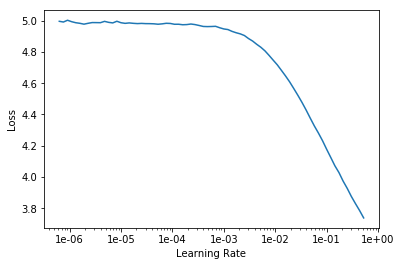

In [81]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [82]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.871073,3.799115,0.223810,00:00


In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


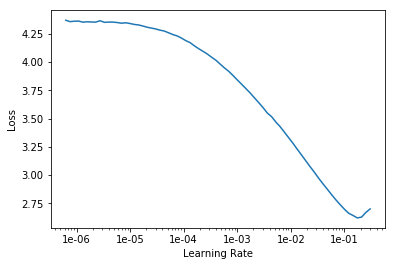

In [84]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [85]:
learn.fit_one_cycle(5, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.253306,3.488278,0.336905,00:00
1,3.810161,2.723856,0.395833,00:00
2,3.365278,2.470927,0.438691,00:00
3,2.981050,2.257555,0.477976,00:00
4,2.687305,2.213123,0.494643,00:00


In [86]:
learn.fit_one_cycle(2, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.589886,2.163813,0.513095,00:00
1,1.401068,2.127441,0.522619,00:00


In [0]:
learn.save('finetuned')

In [0]:
TEXT = "I am feeling happy"
N_WORDS = 30
N_SENTENCES = 2

In [92]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

I am feeling happy xxbos My hobbies are playing , watching tv , reading books xxbos It is generous in the evening xxbos i prefer being simple xxbos i am so happy
I am feeling happy xxbos i am not sleepy xxbos i am not depressed xxbos i prefer being simple xxbos i am very excited to complete this with lot of ease . xxbos


In [0]:
learn.save_encoder('w')

In [0]:
data_clas = (TextList.from_csv(path,'maincyberconsmain.csv', cols='text',vocab=data_lm.vocab)
             .split_by_rand_pct()
             .label_from_df(cols='label')
             .databunch(bs=bs))

data_clas.save('data_clas.pkl')

In [97]:
data_clas = load_data(path, 'data_clas.pkl', bs=bs)
data_clas.show_batch()

text,target
"xxbos i feel like my mood is xxunk xxunk ( like i xxunk xxunk xxunk , high or “ feeling on xxunk of the world ! ” ) or xxunk irritable — and i have a lot more activity and energy that ’s xxunk most of the day , every day .",bipolar
"xxbos i engage in xxunk activities — such as xxunk , xxunk in xxunk i know nothing about , xxunk without xxunk xxunk xxunk or need , or xxunk in sex with people i do n’t xxunk know — even xxunk i xxunk xxunk activities may result in xxunk",bipolar
"xxbos i worry about xxunk on an xxunk and xxunk xxunk or xxunk , such as xxunk xxunk a loved one , xxunk a xxunk in xxunk of a xxunk , xxunk my car into xxunk xxunk ; xxunk xxunk xxunk ; or xxunk dinner xxunk",OCD
"xxbos i perform certain acts over and over again , such as xxunk routine actions ( in xxunk out of xxunk , going through xxunk , re - xxunk xxunk ) a certain xxunk of times or xxunk it xxunk just xxunk",OCD
"xxbos i ca n't xxunk xxunk or sit xxunk xxunk or i find that my thinking , xxunk and xxunk are xxunk much xxunk than usual ( like i xxunk xxunk a xxunk xxunk before i can xxunk a xxunk )",bipolar


In [0]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('w')
learn.freeze()

In [99]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


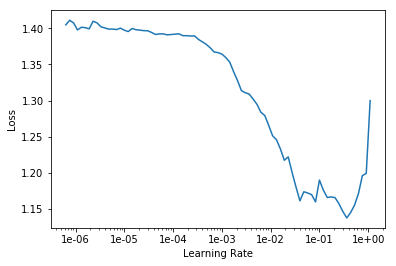

In [100]:
learn.recorder.plot()

In [101]:
learn.fit_one_cycle(1, 3e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.998957,0.850285,0.706522,00:00


In [0]:
learn.save('first')

In [0]:
learn.load('first');

In [104]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.788299,0.566513,0.815217,00:00


In [0]:
learn.save('second')

In [0]:
learn.load('second');

In [107]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.637240,0.492555,0.847826,00:00


In [0]:
learn.save('third')

In [109]:
learn.unfreeze()
learn.fit_one_cycle(3, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.496209,0.423888,0.869565,00:00
1,0.486243,0.375844,0.880435,00:00
2,0.453947,0.373289,0.880435,00:00


In [111]:
learn.predict("I was tensed that I would fail the examination")

(Category normal, tensor(3), tensor([0.0165, 0.0392, 0.0046, 0.9397]))

In [0]:
learn.save('qwerty')